# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
from scipy.stats import linregress
import time

In [21]:
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
weather_api_key

from api_keys import geoapify_key
print(geoapify_key)

ImportError: cannot import name 'geoapify_key' from 'api_keys' (c:\Users\jelde\bootcampNow\python-api-challenge\weatherPY\api_keys.py)

In [7]:

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
latlong = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
range_lat = (-90, 90)
range_long = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(range_lat[0], range_lat[1], size=1500)
longs = np.random.uniform(range_long[0], range_long[1], size=1500)
latlong = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for lat_long in latlong:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0


    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1


    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]

        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]

        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]

        city_country = city_weather["sys"]["country"]
        
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | tongliao
Processing Record 4 of Set 1 | umluj
Processing Record 5 of Set 1 | gopalpur
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | catumbela
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | saipan
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | road town
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | huarmey
Processing Record 16 of Set 1 | vadso
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | sur
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | badger
Processing Record 23 of Set 1 | adam

In [26]:
# Convert the cities weather data into a Pandas DataFrame
citys_df = pd.DataFrame(city_data)

# Show Record Count
citys_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
citys_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,12.63,72,79,5.11,NZ,1673456986
1,cape town,-33.9258,18.4232,24.50,67,96,5.36,ZA,1673456703
2,ushuaia,-54.8000,-68.3000,10.81,71,75,7.72,AR,1673456986
3,norfolk,42.1668,-71.2495,2.54,68,40,4.12,US,1673456987
4,grand gaube,-20.0064,57.6608,26.32,72,67,2.24,MU,1673456987


In [28]:
# Export the City_Data into a csv
citys_df.to_csv("output/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
citys_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
citys_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,3.91,75,75,6.17,SJ,1694290049
1,port-aux-francais,-49.3500,70.2167,1.34,72,32,19.50,TF,1694290049
2,tongliao,43.6125,122.2653,15.30,83,28,2.43,CN,1694290049
3,umluj,25.0213,37.2685,31.52,64,81,3.85,SA,1694290049
4,gopalpur,19.2667,84.9167,27.82,87,65,4.63,IN,1694290050


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

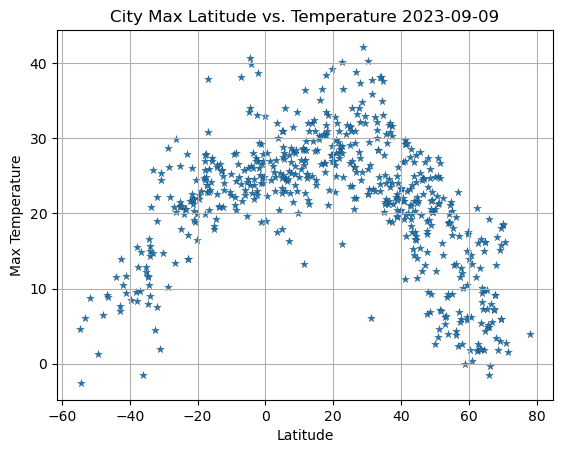

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    citys_df["Lat"],
    citys_df["Max Temp"],
    edgecolor="black",
    linewidths=.1,
    marker="*", 
    alpha=1,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature %s" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

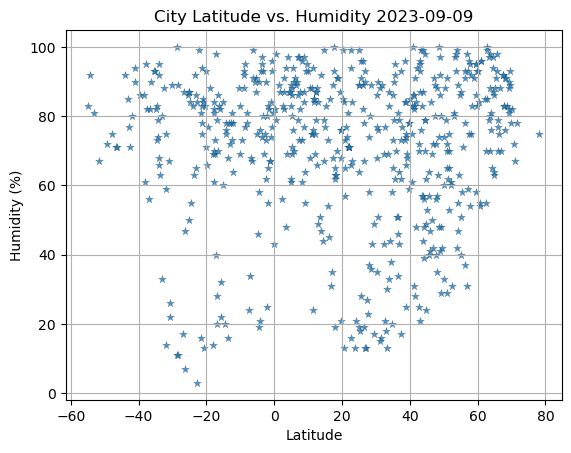

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    citys_df["Lat"],
    citys_df["Humidity"],
    edgecolor="black",
    linewidths=.1,
    marker="*", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity %s" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

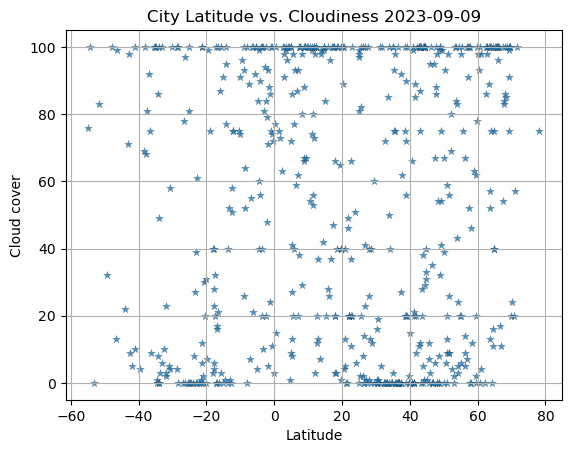

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    citys_df["Lat"],
    citys_df["Cloudiness"],
    edgecolor="black",
    linewidths=.1,
    marker="*", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness %s" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloud cover")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

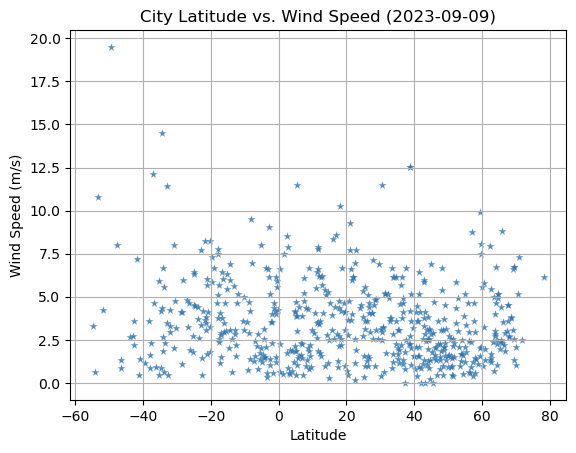

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    citys_df["Lat"], 
    citys_df["Wind Speed"],
    edgecolor="pink", 
    linewidths=.1, 
    marker="*", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_val, y_val, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-", color = 'pink')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [47]:
plot_linear_regression

<function __main__.plot_linear_regression(x_val, y_val, title, text_coordinates)>

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
n_hem_df = citys_df.loc[(citys_df["Lat"] >= 0)]

# Display sample data
n_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,3.91,75,75,6.17,SJ,1694290049
2,tongliao,43.6125,122.2653,15.30,83,28,2.43,CN,1694290049
3,umluj,25.0213,37.2685,31.52,64,81,3.85,SA,1694290049
4,gopalpur,19.2667,84.9167,27.82,87,65,4.63,IN,1694290050
5,hasaki,35.7333,140.8333,24.05,92,75,4.58,JP,1694290050


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
s_hem_df = citys_df.loc[(citys_df["Lat"] < 0)]

# Display sample data
s_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,1.34,72,32,19.50,TF,1694290049
7,catumbela,-12.4314,13.5472,20.87,81,51,1.54,AO,1694290050
8,waitangi,-43.9535,-176.5597,11.57,92,22,2.68,NZ,1694290051
14,huarmey,-10.0681,-78.1522,22.43,69,91,5.00,PE,1694290052
16,ushuaia,-54.8000,-68.3000,4.55,83,76,3.28,AR,1694290052


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4769264243207703


C:\Users\jelde\AppData\Local\Temp\ipykernel_29172\3716724592.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_val,regress_values,"r-", color = 'pink')


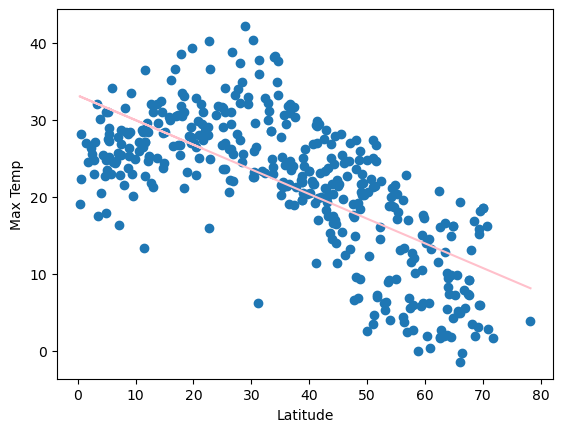

In [53]:
# Linear regression on Northern Hemisphere
x_val = n_hem_df["Lat"]
y_val = n_hem_df["Max Temp"]
plot_linear_regression(x_val, y_val, "Max Temp",(6,-10))

The r-value is: 0.6049131759507841


C:\Users\jelde\AppData\Local\Temp\ipykernel_29172\3716724592.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_val,regress_values,"r-", color = 'pink')


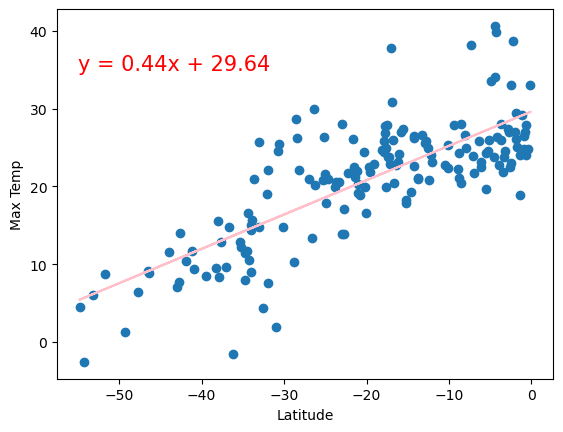

In [54]:
# Linear regression on Southern Hemisphere
x_val = s_hem_df["Lat"]
y_val = s_hem_df["Max Temp"]
plot_linear_regression(x_val, y_val, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** the slope of the line indicates a strong positive correlation between the two variables. the spread of data points indicates that the variability of the data is not so large. the majority of the clumped datum is around 20 temp and greater than -30 in lat. fo the northern hemishpere ther is a strong negative relationship, this is expected as it is the inverse of the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.001434615975250378


C:\Users\jelde\AppData\Local\Temp\ipykernel_29172\3716724592.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_val,regress_values,"r-", color = 'pink')


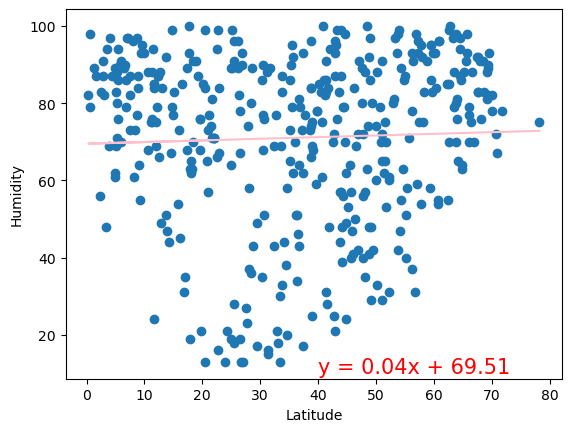

In [55]:
# Northern Hemisphere\

x_val = n_hem_df["Lat"]
y_val = n_hem_df["Humidity"]
plot_linear_regression(x_val, y_val, "Humidity",(40,10))

The r-value is: 0.001257190676848491


C:\Users\jelde\AppData\Local\Temp\ipykernel_29172\3716724592.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_val,regress_values,"r-", color = 'pink')


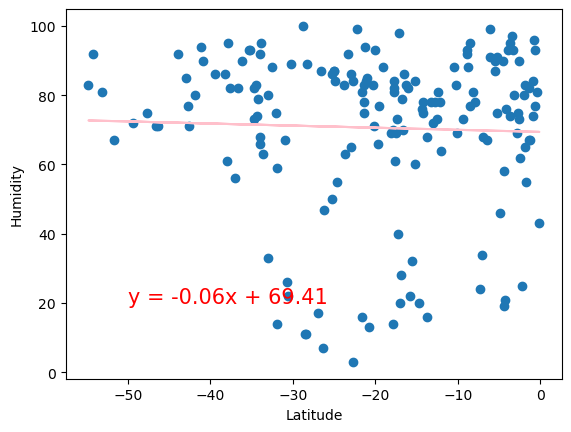

In [56]:
# Southern Hemisphere
x_val = s_hem_df["Lat"]
y_val = s_hem_df["Humidity"]
plot_linear_regression(x_val, y_val, "Humidity", (-50, 20))

**Discussion about the linear relationship:** the slop[e of the line in bnoth graphs indicates that the is a weak relationship between latitude and humidity in both northern and southern hemispheres. there is a great degree of variability within he dataset in both hemispehres indicateing that a regression may not be the best way to visualize this information. ]

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0012399916471266745


C:\Users\jelde\AppData\Local\Temp\ipykernel_29172\3716724592.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_val,regress_values,"r-", color = 'pink')


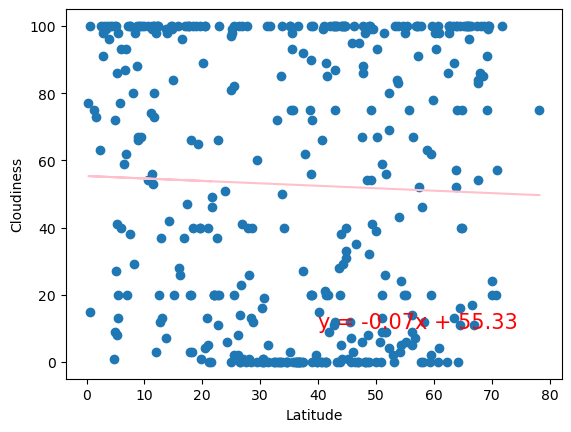

In [57]:
# Northern Hemisphere
x_val = n_hem_df["Lat"]
y_val = n_hem_df["Cloudiness"]
plot_linear_regression(x_val, y_val, "Cloudiness", (40,10))

The r-value is: 0.019163669818636257


C:\Users\jelde\AppData\Local\Temp\ipykernel_29172\3716724592.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_val,regress_values,"r-", color = 'pink')


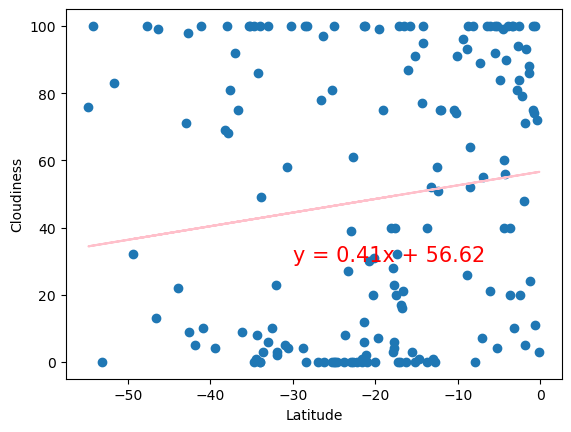

In [58]:
# Southern Hemisphere
x_val = s_hem_df["Lat"]
y_val = s_hem_df["Cloudiness"]
plot_linear_regression(x_val, y_val, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** the slope of the line indicates that there is a weak correlation between the latitude and cloudiness variables. indicating that distance from the equator may not be a significant predictor of cloudiness but rather perhaps some other variable like terrain and altitude, or proximity to bodies of water. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006545871986032195


C:\Users\jelde\AppData\Local\Temp\ipykernel_29172\3716724592.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_val,regress_values,"r-", color = 'pink')


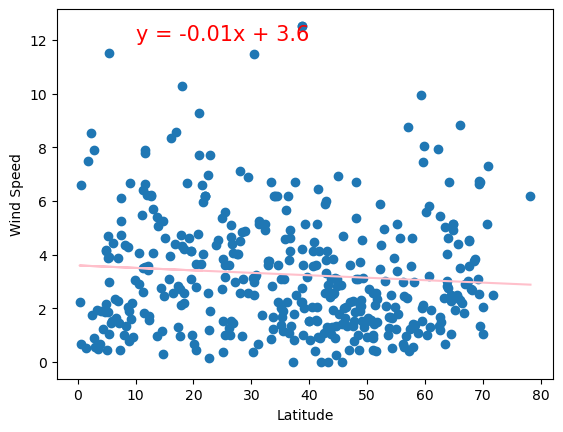

In [59]:
# Northern Hemisphere
x_val = n_hem_df["Lat"]
y_val = n_hem_df["Wind Speed"]
plot_linear_regression(x_val, y_val, "Wind Speed", (10,12))

The r-value is: 0.0170905635141141


C:\Users\jelde\AppData\Local\Temp\ipykernel_29172\3716724592.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_val,regress_values,"r-", color = 'pink')


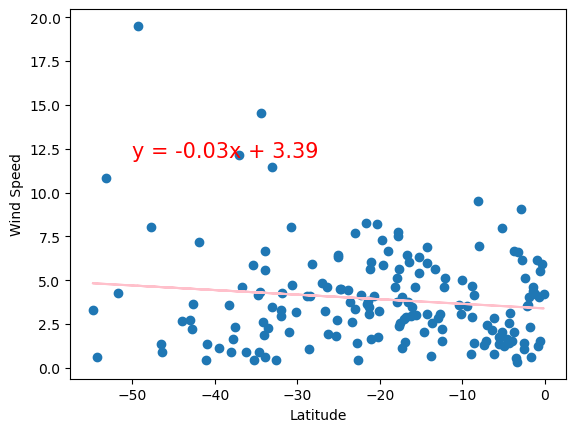

In [60]:
# Southern Hemisphere
x_val = s_hem_df["Lat"]
y_val = s_hem_df["Wind Speed"]
plot_linear_regression(x_val, y_val, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:**the weak relationship between latitude and wind speed indicate that wind speed may not be caused by latitude but rather some other variables. the data spread is not so spread out as other plots but is not that small. 